In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.risks as risks
import mlgrad.gd as gd

In [18]:
X, Y = load_iris(return_X_y=True)
print(X.shape, Y.shape)

(150, 4) (150,)


In [19]:
from sklearn.decomposition import PCA
pca = PCA(2)
U = pca.fit_transform(X)

In [31]:
Y12 = Y[Y != 0]
Y12[Y12 == 2] = -1
Y12 = Y12.astype("d")
U12 = U[Y != 0]

In [32]:
print(U12.shape, Y12.shape)

(100, 2) (100,)


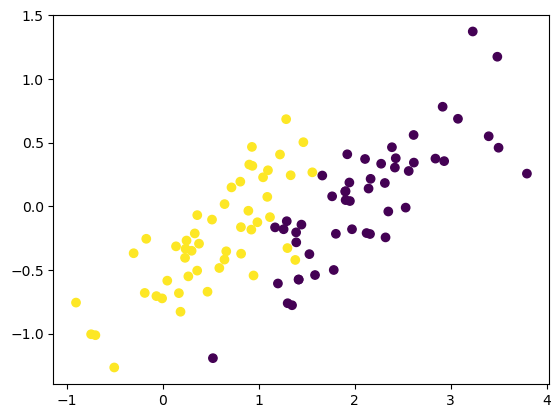

In [33]:
plt.scatter(U12[:,0], U12[:,1], c=Y12)
plt.show()

In [38]:
loss_func = loss.MarginLoss(funcs.Hinge(0))
linmod = models.LinearModel(2)
linmod.init_param()
risk_func = risks.ERisk(U12, Y12, linmod, loss_func)
alg = gd.FG(risk_func)
alg.fit()

In [39]:
import mlgrad.plots as plots

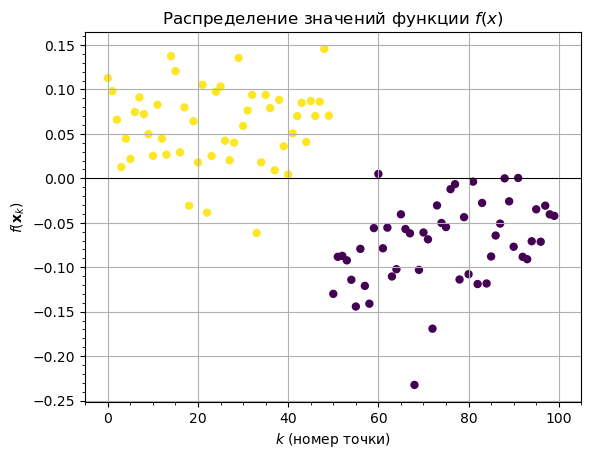

In [40]:
plots.plot_cls_function(linmod, U12, Y12)
plt.show()

In [44]:
xrange = np.linspace(-1,4,100)
yrange = np.linspace(-1.5,1.5,100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[XX.ravel(), YY.ravel()]
Z = linmod.evaluate_all(XY)
ZZ = Z.reshape(XX.shape)

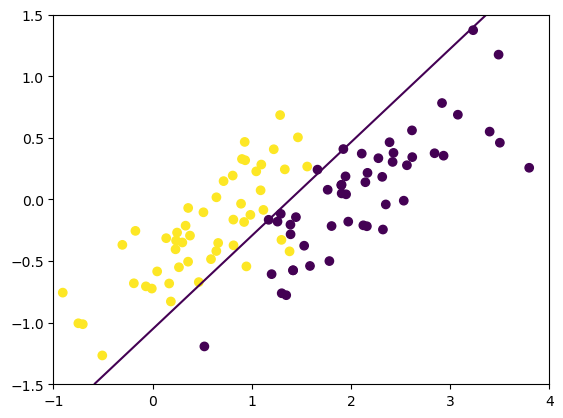

In [48]:
plt.scatter(U12[:,0], U12[:,1], c=Y12)
plt.contour(ZZ, levels=[0], extent=(-1,4,-1.5,1.5))
plt.show()